# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
## parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=10_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli_start='best/malli_baseline'
perusmalli='best/malli_base_dev'
perusresults='results/malli_base_dev'
prefmalli='best/malli_perus_prefnoise'
prefresults='results/perus_results_prefnoise'
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [5]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.run_results(debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=False,cont=True,start_from=perusmalli_start,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.999    |
| fps                | 3086     |
| nupdates           | 1        |
| policy_entropy     | 1        |
| policy_loss        | -0.0119  |
| total_timesteps    | 21816    |
| value_loss         | 0.015    |
---------------------------------


------

---------------------------------
| explained_variance | 0.995    |
| fps                | 3197     |
| nupdates           | 60       |
| policy_entropy     | 1        |
| policy_loss        | -0.0039  |
| total_timesteps    | 1308960  |
| value_loss         | 0.0567   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 3191     |
| nupdates           | 70       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0172  |
| total_timesteps    | 1527120  |
| value_loss         | 0.0474   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 3186     |
| nupdates           | 80       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0114  |
| total_timesteps    | 1745280  |
| value_loss         | 0.0387   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3115     |
| nupdates           | 330      |
| policy_entropy     | 0.998    |
| policy_loss        | -0.013   |
| total_timesteps    | 7199280  |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3115     |
| nupdates           | 340      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00997 |
| total_timesteps    | 7417440  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3116     |
| nupdates           | 350      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.018   |
| total_timesteps    | 7635600  |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

In [3]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_steps',plot=False,
                results='results/steps_results_test',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc2_porras.render(load='results/steps_results_test')

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1


KeyboardInterrupt: 

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

Rahavirrat skaalattuna väestötasolle
+------------------+----------------------+----------------------+-----------------------+
|                  |                  e/v |              toteuma |                   ero |
|------------------+----------------------+----------------------+-----------------------|
| palkkatulo       | 88,508,311,953.18    | 89,134,200,000.00    |    -625,888,046.82    |
| etuusmeno        | 11,619,557,441.77    | 36,945,147,749.00    | -25,325,590,307.23    |
| verot            | 27,777,748,794.92    | 30,763,000,000.00    |  -2,985,251,205.08    |
| valtionvero      |  3,191,218,091.70    |  5,542,000,

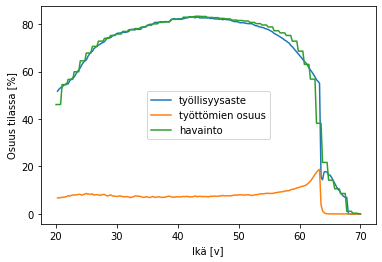

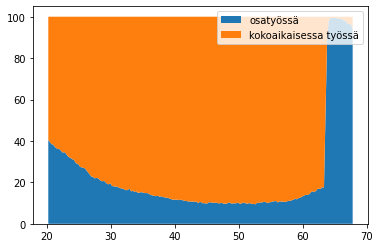

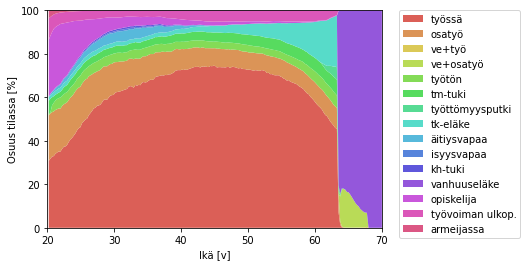

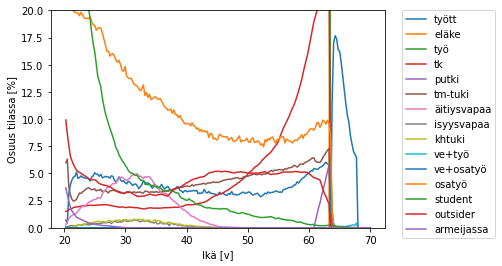

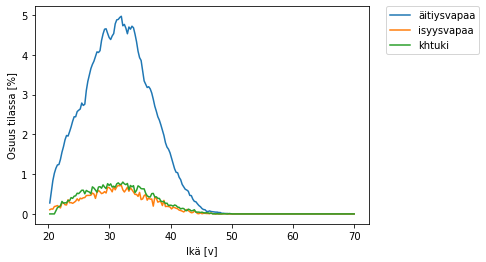

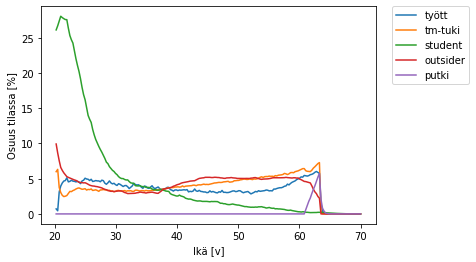

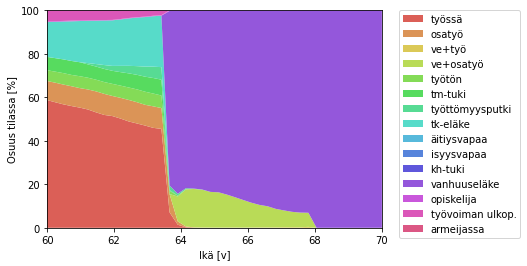

Lisäpäivillä on 6500 henkilöä


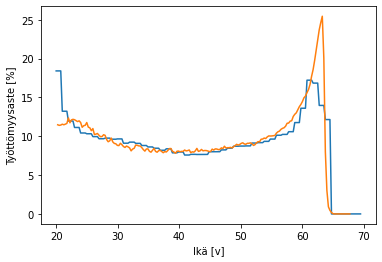

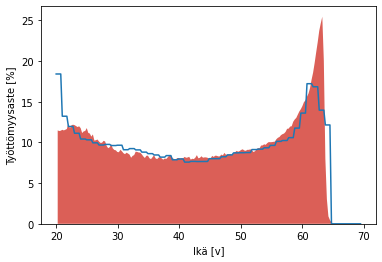

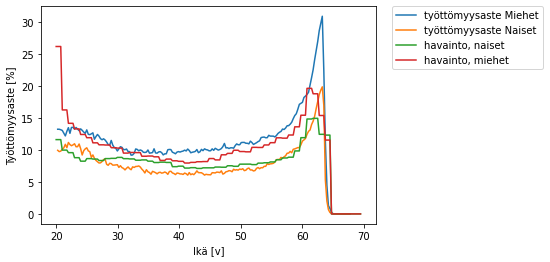

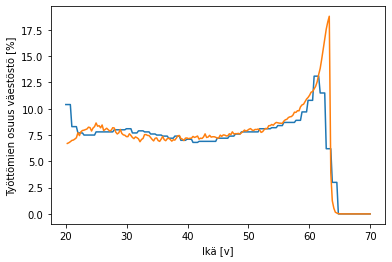

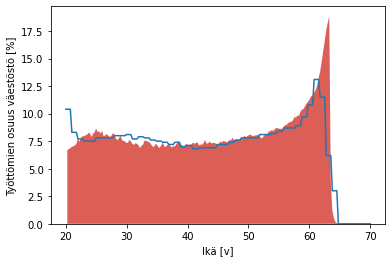

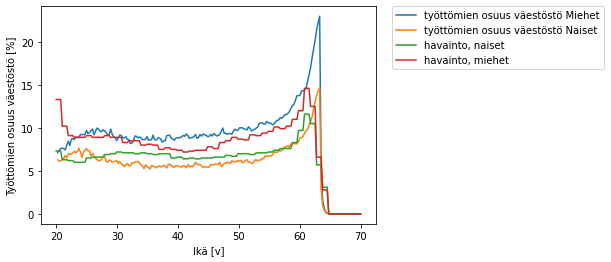

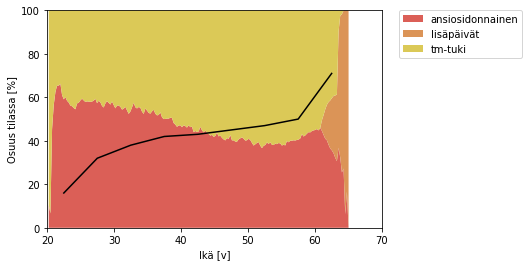

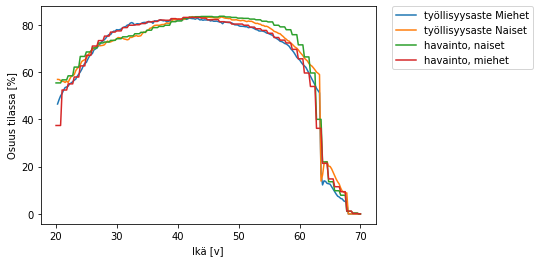

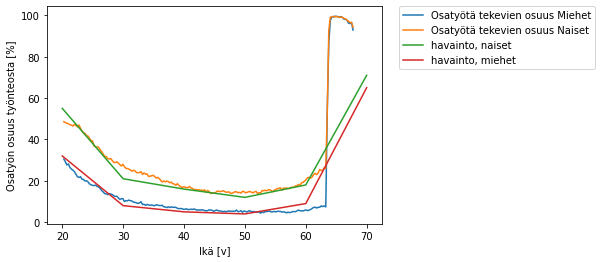

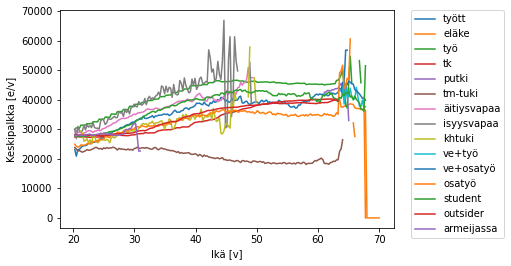

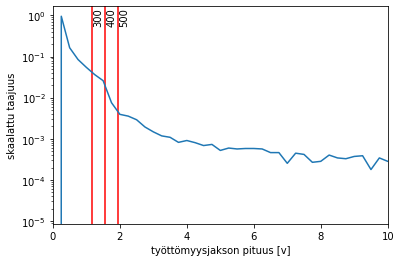

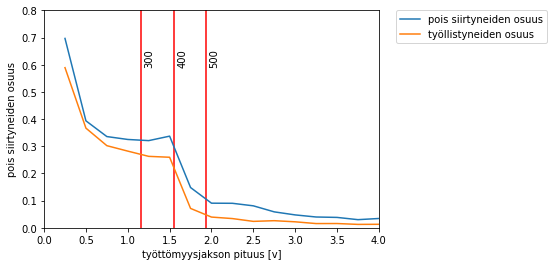

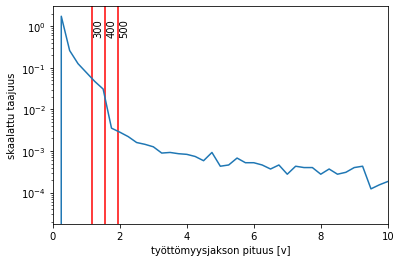

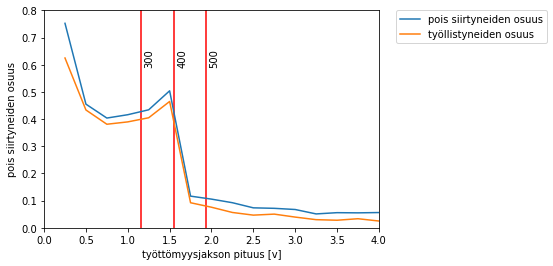

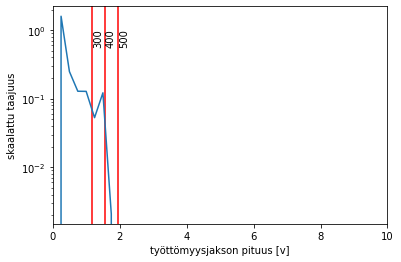

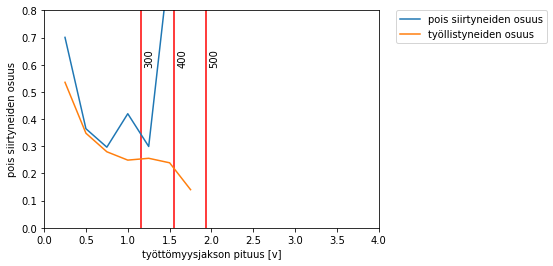

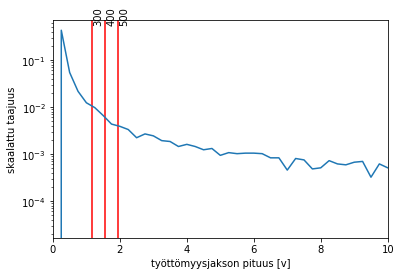

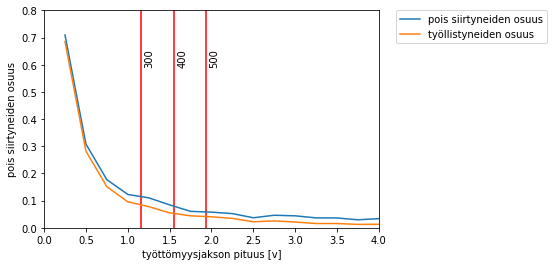

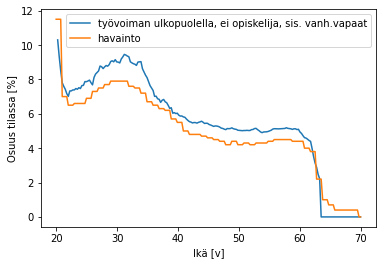

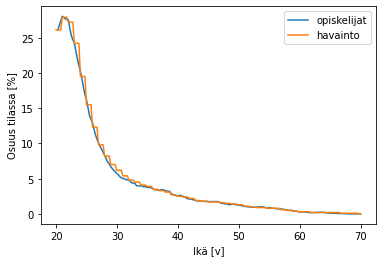

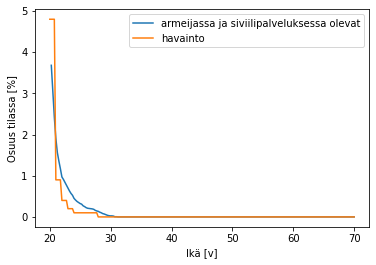

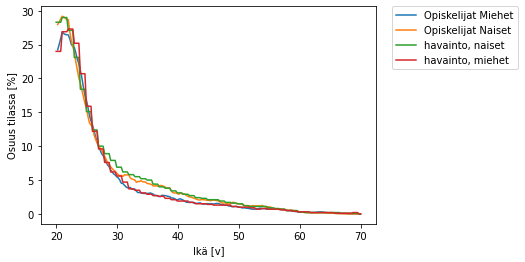

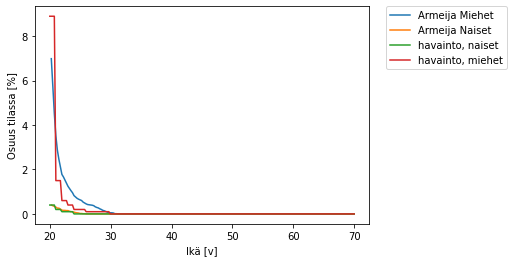

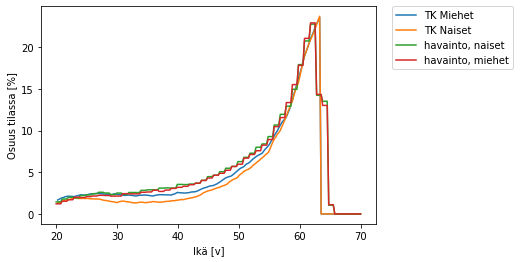

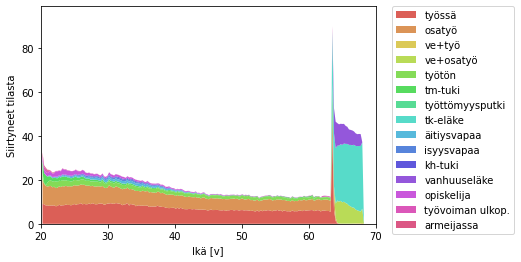

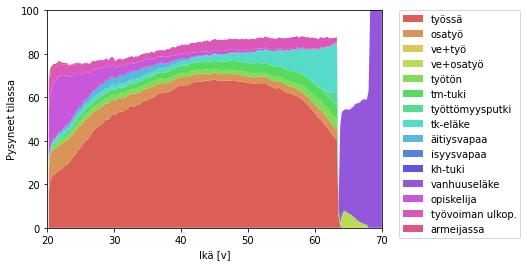

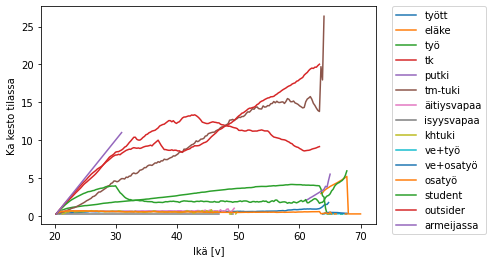

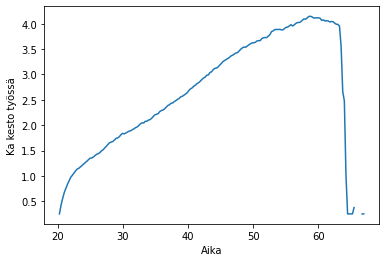

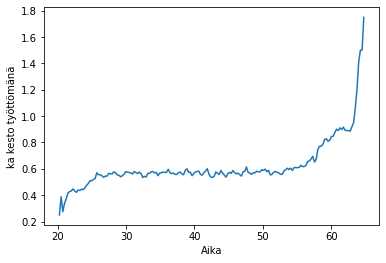

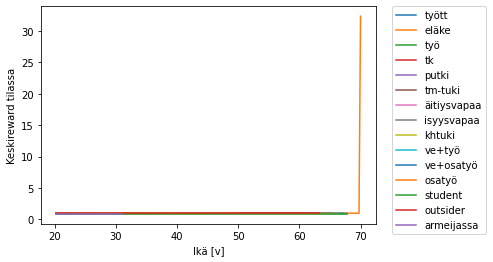

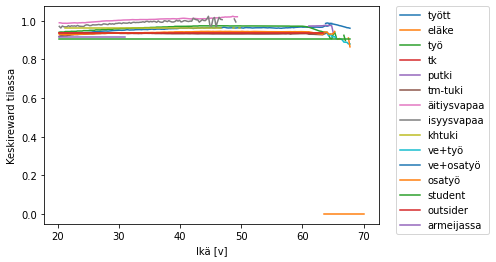

No handles with labels found to put in legend.


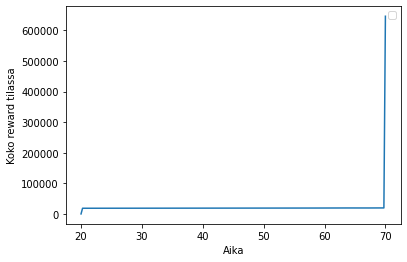

yhteensä reward 223.8956894342808


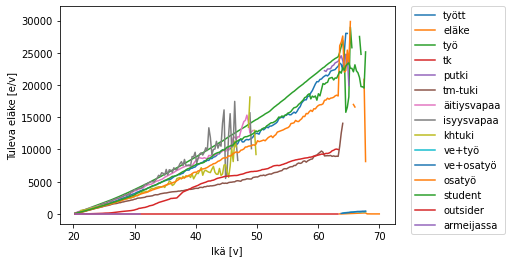

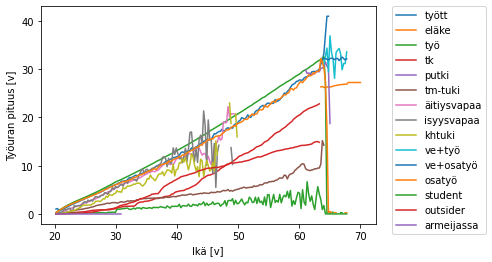

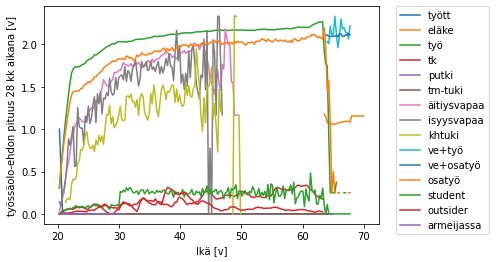

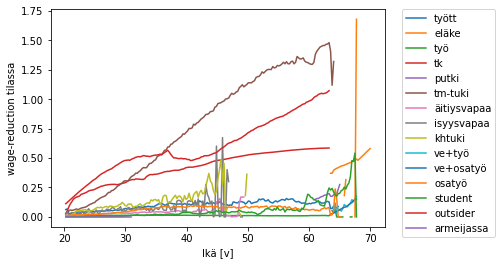

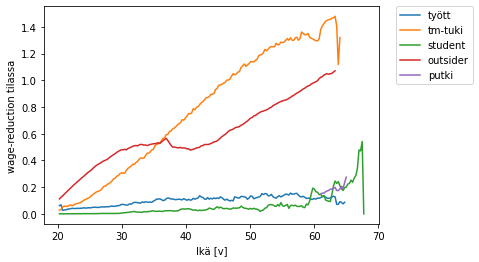

In [3]:
cc1b=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1b.render(load=perusresults)
cc1b.load_sim(load=perusresults)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

Rahavirrat skaalattuna väestötasolle
+------------------+----------------------+----------------------+-------------------+
|                  |                perus |           vaihtoehto |               ero |
|------------------+----------------------+----------------------+-------------------|
| palkkatulo       | 89,082,973,457.02    | 88,508,311,953.18    | 574,661,503.83    |
| etuusmeno        | 11,527,859,208.69    | 11,619,557,441.77    | -91,698,233.08    |
| verot            | 27,970,681,427.26    | 27,777,748,794.92    | 192,932,632.35    |
| valtionvero      |  3,231,190,959.92    |  3,191,218,091.70    |  39,972,868.

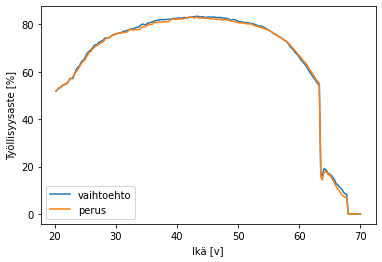

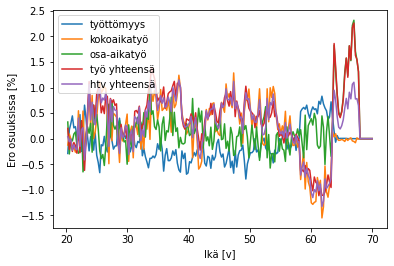

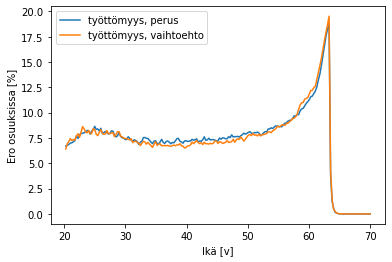

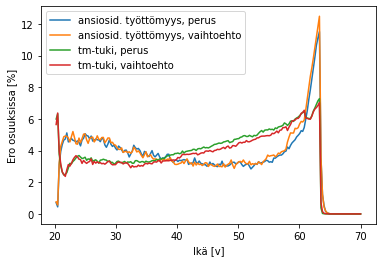

Työllisyysvaikutus 21-63-vuotiaisiin noin 7750 htv ja 9141 työllistä
Työllisyysastevaikutus 21-63-vuotiailla noin 0.31 prosenttia (75.35 vs 75.04)
epävarmuus työllisyysasteissa 0.0139, hajonta 0.0835


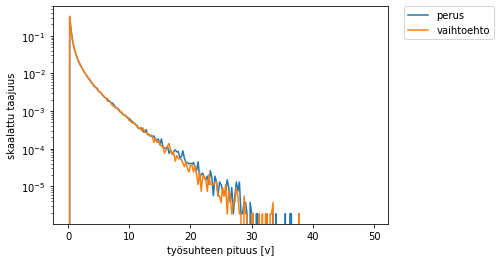

Jakauma ansiosidonnainen+tmtuki+putki, no max age
vaihtoehto keskikesto 0.7282136967277146 v perus Keskikesto 0.7028803417883625 v
Skaalaamaton vaihtoehto lkm 92168 v perus lkm 92923 v
Skaalaamaton vaihtoehto työtpäiviä yht 67118.0 v perus työtpäiviä yht 65313.75 v


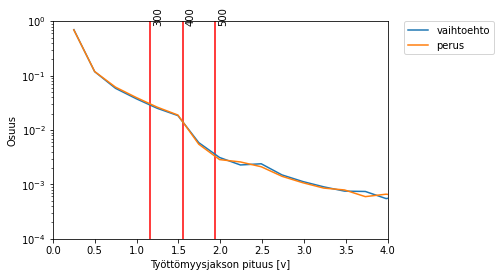

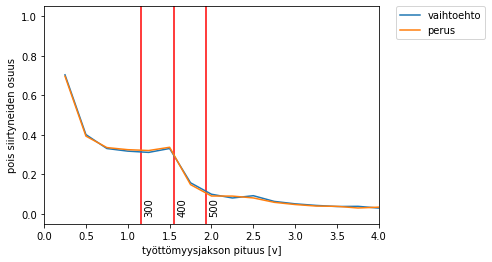

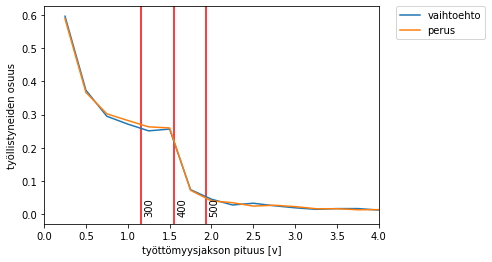

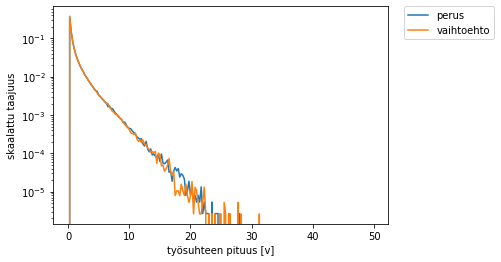

Jakauma ansiosidonnainen+tmtuki+putki, max age 54
vaihtoehto keskikesto 0.44907797053022974 v perus Keskikesto 0.4424754770599893 v
Skaalaamaton vaihtoehto lkm 79607 v perus lkm 80231 v
Skaalaamaton vaihtoehto työtpäiviä yht 35749.75 v perus työtpäiviä yht 35500.25 v


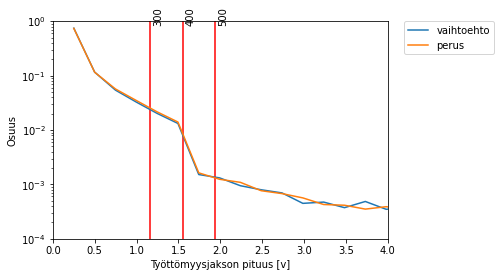

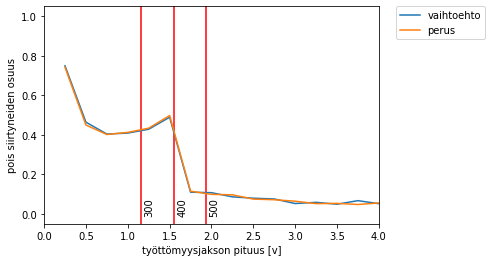

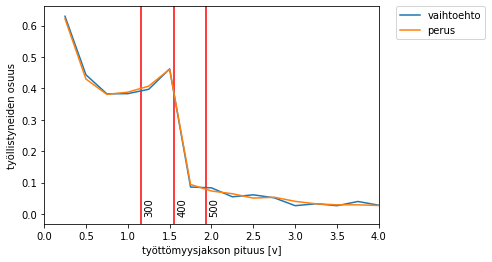

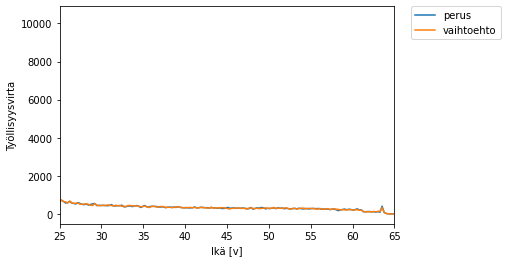

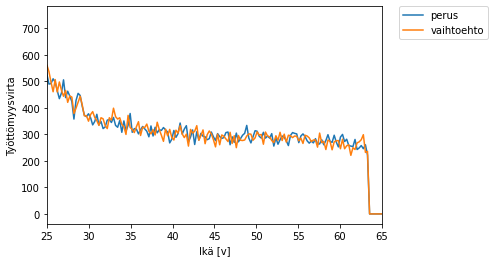

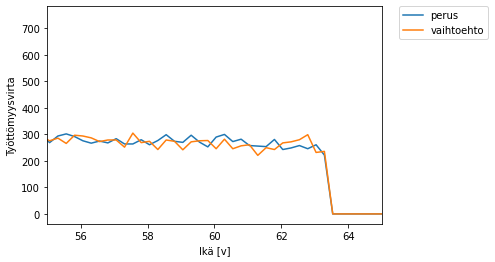

In [4]:
cc2_porras=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc2_porras.render(load='results/steps_results')
cc2_porras.load_sim(load='results/steps_results_test')
cc2_porras.compare_with(cc1b)

In [9]:
89_134_200_000*0.019

1693549800.0